In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../"))

# Any results you write to the current directory are saved as output.

['$Recycle.Bin', 'AI', 'Config.Msi', 'Documents and Settings', 'hiberfil.sys', 'HP_LaserJet_Pro_MFP_M225-M226', 'Intel', 'MinGW', 'MSOCache', 'OEM', 'OneDriveTemp', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Recovery', 'swapfile.sys', 'System Volume Information', 'Users', 'Windows']


In [147]:
os.chdir("/AI")

In [148]:
os.chdir("./Numbers")

In [149]:
train=pd.read_csv("./train.csv")

In [150]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test=pd.read_csv("./test.csv")

In [152]:
test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
Ytrain=train["label"]

In [154]:
Ytrain.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [155]:
Xtrain=train.drop(labels=["label"],axis=1)
type(Xtrain)


pandas.core.frame.DataFrame

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

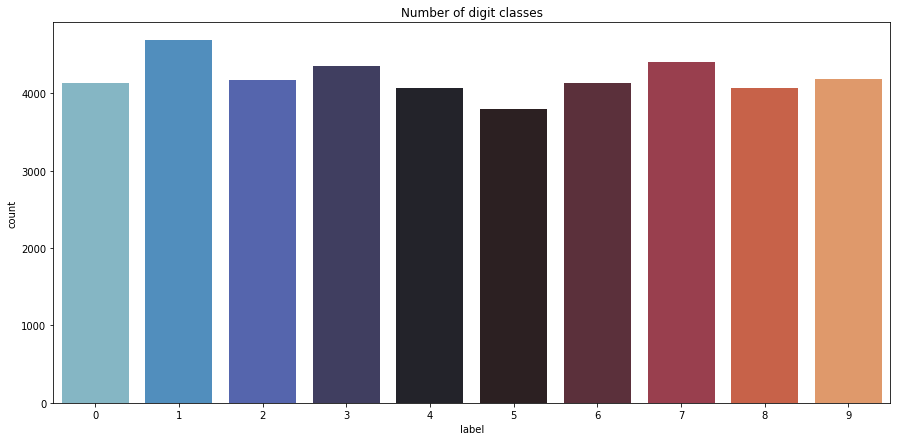

In [156]:
plt.figure(figsize=(15,7))
g = sns.countplot(Ytrain, palette="icefire")
plt.title("Number of digit classes")
Ytrain.value_counts()


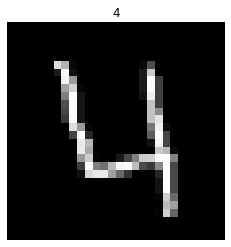

In [157]:
img=Xtrain.iloc[3].as_matrix()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()



In [158]:
Xtrain=Xtrain/255.0
test=test/255.0


In [159]:
Xtrain=Xtrain.values.reshape(-1,28,28,1)

In [160]:
test=test.values

In [161]:
test=test.reshape(-1,28,28,1)

In [162]:
print("Xtrain shape:",Xtrain.shape)
print("Xtest shape:", test.shape)

Xtrain shape: (42000, 28, 28, 1)
Xtest shape: (28000, 28, 28, 1)


In [163]:
from keras.utils.np_utils import to_categorical
Ytrain=to_categorical(Ytrain, num_classes=10)
Ytrain

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(Xtrain,Ytrain,test_size=0.1,random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


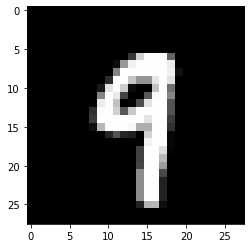

In [165]:
plt.imshow(X_train[2,:,:,0],cmap='gray')
plt.show()

In [166]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [167]:
recogn=Sequential()
recogn.add(Conv2D(filters=8, kernel_size=(5,5), padding="same", activation="relu", input_shape=(28,28,1)))
recogn.add(MaxPool2D(pool_size=(2,2)))
recogn.add(Dropout(0.25))
recogn.add(Conv2D(filters=16, kernel_size=(3,3), padding="same",activation="relu"))
recogn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recogn.add(Dropout(0.25))
recogn.add(Flatten())
recogn.add(Dense(256, activation="relu"))
recogn.add(Dropout(0.25))
recogn.add(Dense(10, activation="softmax"))

In [168]:
recogn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)              

In [169]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [170]:
epochs=10
batch_size=250

In [171]:
recogn.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [172]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [173]:
datagen

In [174]:
output=recogn.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//batch_size)


Epoch 1/10
151/151 [==============================] - 11s 73ms/step - loss: 2.1682 - accuracy: 0.1968 - val_loss: 1.6502 - val_accuracy: 0.4719
Epoch 2/10
151/151 [==============================] - 11s 72ms/step - loss: 1.7987 - accuracy: 0.3630 - val_loss: 0.9046 - val_accuracy: 0.7607
Epoch 3/10
151/151 [==============================] - 11s 71ms/step - loss: 1.5596 - accuracy: 0.4637 - val_loss: 0.5998 - val_accuracy: 0.8469
Epoch 4/10
151/151 [==============================] - 11s 76ms/step - loss: 1.4430 - accuracy: 0.5034 - val_loss: 0.4878 - val_accuracy: 0.8748
Epoch 5/10
151/151 [==============================] - 11s 74ms/step - loss: 1.3692 - accuracy: 0.5309 - val_loss: 0.3646 - val_accuracy: 0.9017
Epoch 6/10
151/151 [==============================] - 13s 86ms/step - loss: 1.3172 - accuracy: 0.5492 - val_loss: 0.3419 - val_accuracy: 0.9076
Epoch 7/10
151/151 [==============================] - 11s 73ms/step - loss: 1.2736 - accuracy: 0.5658 - val_loss: 0.2984 - val_accuracy:

In [5]:
random=np.random.rand(1000,28,28)
np.amax(random)

0.9999989609243048

In [6]:
np.amin(random)

3.120831988612238e-06

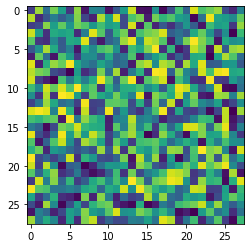

In [225]:
plt.imshow(random[1])

In [226]:
c=0.0


In [179]:
for r in random:
    d=np.dot(r.reshape(1,784),X_train[8].reshape(784,1))
    if(d[0][0]>46.67550948):
        f=r
    c=d[0][0]

In [180]:
np.dot(random[0].reshape(1,784),X_train[8].reshape(784,1))

array([[44.85494773]])

In [181]:
np.dot(f.reshape(1,784),X_train[8].reshape(784,1))

array([[46.67550948]])

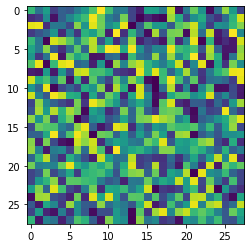

In [182]:
plt.imshow(f.reshape(28,28))

In [195]:
recogn.predict(f.reshape(1,28,28,1)).shape

(1, 10)

In [233]:
e=list(range(10))
for x in range(10):
    e[x]=0
e

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
for j in random:
    l=recogn.predict(j.reshape(1,28,28,1))
    for i in range(10):
        if(l[0][i]>=0.90):
            e[i]=e[i]+1
print("Done")
        

In [230]:
e

[0, 0, 0, 0, 0, 0, 0, 0, 10000, 0]

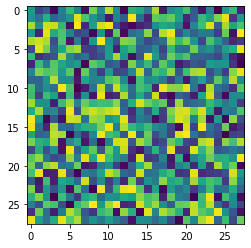

In [229]:
plt.imshow(random[8].reshape(28,28))

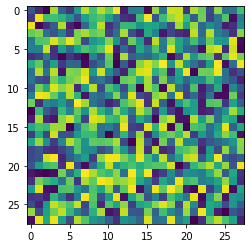

In [219]:
plt.imshow(random[28].reshape(28,28))

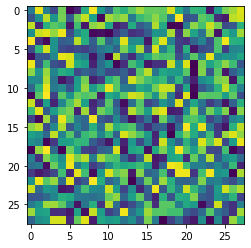

In [220]:
plt.imshow(random[208].reshape(28,28))

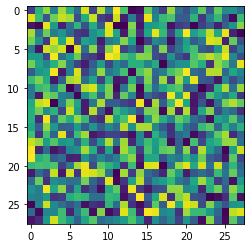

In [221]:
plt.imshow(random[38].reshape(28,28))

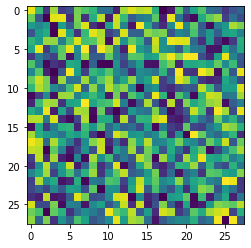

In [222]:
plt.imshow(random[48].reshape(28,28))

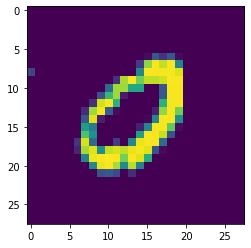

In [186]:
plt.imshow(X_train[8].reshape(28,28))

In [67]:
recogn.layers[0].name

'conv2d_7'

In [72]:
recogn.get_layer('conv2d_7').output[0]

<tf.Tensor 'strided_slice:0' shape=(28, 28, 8) dtype=float32>

In [91]:
y2=recogn.predict(X_val[4].reshape(-1,28,28,1))

In [97]:
y2

array([[2.1503583e-04, 2.6051254e-07, 2.4051817e-04, 7.3208597e-05,
        6.5706210e-04, 1.1376279e-04, 3.9092687e-05, 1.0807238e-03,
        1.7758630e-02, 9.7982168e-01]], dtype=float32)

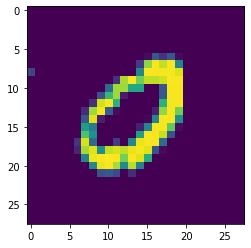

In [105]:
plt.imshow(X_train[8].reshape(28,28))

In [98]:
Y_2=recogn.predict(X_train)

In [106]:
Y_2.shape

(37800, 10)

In [107]:
Y_2val=recogn.predict(X_val)
Y_2val.shape

(4200, 10)

In [108]:
reco=Sequential()
reco.add(Conv2D(filters=8, kernel_size=(5,5), padding="same", activation="relu", input_shape=(28,28,1)))
reco.add(MaxPool2D(pool_size=(2,2)))
reco.add(Dropout(0.25))
reco.add(Conv2D(filters=16, kernel_size=(3,3), padding="same",activation="relu"))
reco.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
reco.add(Dropout(0.25))
reco.add(Flatten())
reco.add(Dense(256, activation="relu"))
reco.add(Dropout(0.25))
reco.add(Dense(10, activation="softmax"))

In [109]:
reco.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [111]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [117]:
output=reco.fit_generator(datagen.flow(X_train,Y_2,batch_size=batch_size),epochs=10, validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 11s 72ms/step - loss: 1.0880 - accuracy: 0.6773 - val_loss: 0.2300 - val_accuracy: 0.9374
Epoch 2/10
151/151 [==============================] - 11s 74ms/step - loss: 1.0851 - accuracy: 0.6810 - val_loss: 0.2443 - val_accuracy: 0.9364
Epoch 3/10
151/151 [==============================] - 11s 74ms/step - loss: 1.0805 - accuracy: 0.6816 - val_loss: 0.2209 - val_accuracy: 0.9417
Epoch 4/10
151/151 [==============================] - 11s 73ms/step - loss: 1.0759 - accuracy: 0.6821 - val_loss: 0.2222 - val_accuracy: 0.9410
Epoch 5/10
151/151 [==============================] - 11s 74ms/step - loss: 1.0759 - accuracy: 0.6828 - val_loss: 0.2178 - val_accuracy: 0.9424
Epoch 6/10
151/151 [==============================] - 11s 75ms/step - loss: 1.0721 - accuracy: 0.6847 - val_loss: 0.2303 - val_accuracy: 0.9388
Epoch 7/10
151/151 [==============================] - 11s 74ms/step - loss: 1.0654 - accuracy: 0.6886 - val_loss: 0.2334 - val_accuracy:

In [124]:
recogn.get_layer('conv2d_7').weights

[<tf.Variable 'conv2d_7/kernel:0' shape=(5, 5, 1, 8) dtype=float32, numpy=
 array([[[[-0.09937429, -0.1766933 , -0.08909974,  0.17107703,
           -0.18741594, -0.75126594,  0.12341451,  0.10045063]],
 
         [[-0.05318987, -0.03709175,  0.03031311, -0.1749236 ,
           -0.29876587, -0.36666065,  0.21506484,  0.19467372]],
 
         [[-0.22901855, -0.1388252 , -0.34843197, -0.20058134,
           -0.12292611, -0.21479788, -0.10906991,  0.13295573]],
 
         [[-0.1310239 , -0.14038934, -0.1895732 ,  0.0367396 ,
           -0.01181295, -0.23493494, -0.29046163, -0.00080217]],
 
         [[ 0.01573169, -0.06108277,  0.01096953,  0.15884545,
            0.16994396,  0.06472851,  0.18170795, -0.03185871]]],
 
 
        [[[ 0.12216989, -0.23103322, -0.2483948 ,  0.13205048,
           -0.18428801,  0.06271674, -0.12609181, -0.18125214]],
 
         [[-0.17131978, -0.24662969, -0.47891966, -0.13725515,
           -0.2015139 , -0.1853869 ,  0.08689678,  0.12822938]],
 
         [[-

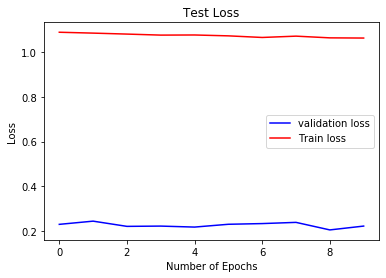

In [125]:
plt.plot(output.history['val_loss'], color='b', label="validation loss")
plt.plot(output.history['loss'], color='r', label="Train loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
plt.plot(output.history['loss'], color='b', label="Train loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [116]:
X_val.shape

(4200, 28, 28, 1)

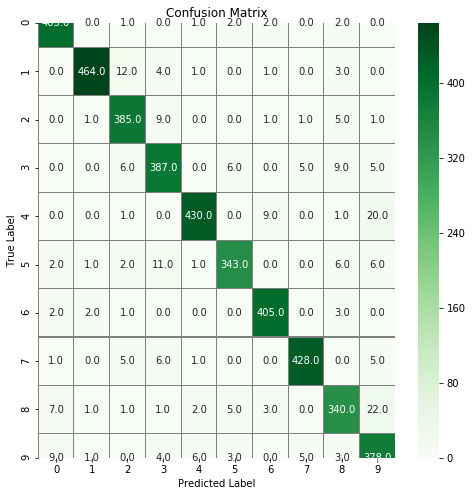

In [120]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = recogn.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()